In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
import scipy.stats as stats

In [2]:
with open('all_data_filtered_day_hikes_subset_features.pickle','rb') as read_file:
   hikes_data = pickle.load(read_file)

df = pd.DataFrame(hikes_data)

In [3]:
with open('all_data_filtered_day_hikes2.pickle','rb') as read_file:
   hikes_data = pickle.load(read_file)

df2 = pd.DataFrame(hikes_data)


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1853 entries, 0 to 2495
Data columns (total 50 columns):
Coast                                      1853 non-null float64
Dogs allowed on leash                      1853 non-null float64
Dogs not allowed                           1853 non-null float64
Established campsites                      1853 non-null float64
Fall foliage                               1853 non-null float64
Good for kids                              1853 non-null float64
Lakes                                      1853 non-null float64
Mountain views                             1853 non-null float64
Old growth                                 1853 non-null float64
Ridges/passes                              1853 non-null float64
Rivers                                     1853 non-null float64
Summits                                    1853 non-null float64
Waterfalls                                 1853 non-null float64
Wildflowers/Meadows                        1853 

# Very Basic Model

In [4]:
X = df2.drop(columns=['rating','distance_how','permit','region','subregion','trail_name'],axis=1)
y = df2['rating']

In [5]:
# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_val)

print('MAE:', metrics.mean_absolute_error(y_val, predictions))
print('MSE:', metrics.mean_squared_error(y_val, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, predictions)))
print('R^2:', metrics.explained_variance_score(y_val,predictions))

MAE: 0.6339505237474126
MSE: 0.649378060241125
RMSE: 0.8058399718561527
R^2: 0.0712773672643422


## interupt to test dataset predictions from larger data set (highest elevation NaN included). Also more features. 

In [62]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1853 entries, 0 to 2495
Data columns (total 50 columns):
Coast                                      1853 non-null float64
Dogs allowed on leash                      1853 non-null float64
Dogs not allowed                           1853 non-null float64
Established campsites                      1853 non-null float64
Fall foliage                               1853 non-null float64
Good for kids                              1853 non-null float64
Lakes                                      1853 non-null float64
Mountain views                             1853 non-null float64
Old growth                                 1853 non-null float64
Ridges/passes                              1853 non-null float64
Rivers                                     1853 non-null float64
Summits                                    1853 non-null float64
Waterfalls                                 1853 non-null float64
Wildflowers/Meadows                        1853 

In [6]:
Xm = df2.drop(columns=['rating','distance_how','permit','region','subregion','trail_name'],axis=1)
ym = df2['rating']

In [7]:
Xm, Xm_test, ym, ym_test = train_test_split(Xm, ym, test_size=.2, random_state=10)

Xm_train, Xm_val, ym_train, ym_val = train_test_split(Xm, ym, test_size=.25, random_state=3)
lr_m = LinearRegression()
lr_m.fit(Xm_train, ym_train)
predictions_m = lr_m.predict(Xm_val)

print('MAE:', metrics.mean_absolute_error(ym_val, predictions_m))
print('MSE:', metrics.mean_squared_error(ym_val, predictions_m))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ym_val, predictions_m)))
print('R^2:', metrics.explained_variance_score(ym_val,predictions_m))

MAE: 0.6339505237474126
MSE: 0.649378060241125
RMSE: 0.8058399718561527
R^2: 0.0712773672643422


## That's actually better - switch to df2 

df 's results were: 
* MAE: 0.5646874057694029
* MSE: 0.5426558391350723
* RMSE: 0.7366517760346962
* R^2: 0.03083189489837035


In [8]:
residuals = y_val - predictions

In [9]:
results_df = pd.DataFrame()
results_df['residuals'] = residuals
results_df['predictions'] = predictions
results_df['y_val'] = y_val
results_df.head()

,residuals,predictions,y_val
1501,0.823220,3.176780,4.0
3169,0.047351,2.952649,3.0
3108,1.304896,2.995104,4.3
2885,-0.014316,3.014316,3.0
1452,0.334440,3.565560,3.9


In [10]:
plt.figure(figsize=(10,5))
sns.set_style("white")
sns.set_context("poster")

<Figure size 720x360 with 0 Axes>

In [12]:
#results_df.plot(x='y_val',y='predictions',kind='scatter',scatter_kws={"marker":"D","s": 10})

Residual plot


<Figure size 720x360 with 0 Axes>

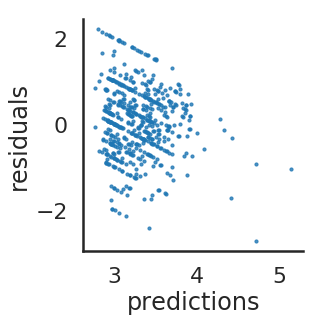

In [13]:
print("Residual plot")
plt.figure(figsize=(10,5))
sns.lmplot(y='residuals',x='predictions',data=results_df,scatter_kws={"marker":"D","s": 10},fit_reg=False)
#results_df.plot(x='predictions',y='residuals',kind='scatter',scatter_kws={"marker":"D","s": 10})
plt.savefig('residuals vs predictions.png',dpi=300,transparent=True)

**Residuals are a straight line, but heteroskedastic**

Q-Q plot matches normal decently well. None of the others seem to match (light tailed, left skew, bimodal, heavy-tailed, right skew)

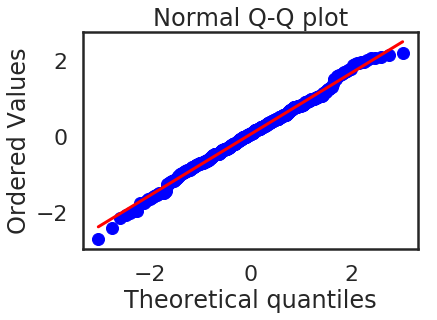

In [14]:
# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.savefig('QQ_plot.png',dpi=300,transparent=True)

In [15]:
df3 = pd.concat([df,results_df])
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1699 entries, 0 to 1778
Data columns (total 24 columns):
Established campsites    1137 non-null float64
Issaquah Alps            1137 non-null float64
Mount Rainier Area       1137 non-null float64
Mountain views           1137 non-null float64
National Park Pass       1137 non-null float64
North Cascades           1137 non-null float64
Northwest Forest Pass    1137 non-null float64
Ridges/passes            1137 non-null float64
Sno-Parks Permit         1137 non-null float64
Snoqualmie Region        1137 non-null float64
Summits                  1137 non-null float64
Waterfalls               1137 non-null float64
Wildflowers/Meadows      1137 non-null float64
distance_mi              1137 non-null float64
highest_pt               1137 non-null float64
lat                      1137 non-null float64
long                     1137 non-null float64
num_features             1137 non-null float64
num_reports              1137 non-null float64


/home/kmussar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


## Learning Curves

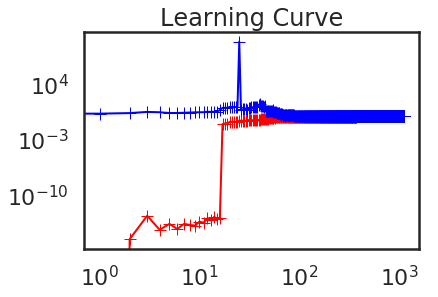

In [72]:
# Using X_train, X_val, y_train, y_val from above when initially split 
train_errors, val_errors = [], []
for m in range(1,len(X_train)): 
    # used lr as model
    model = lr
    model.fit(X_train[:m],y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
    val_errors.append(mean_squared_error(y_val_predict,y_val))
plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train',c='r')
plt.plot(np.sqrt(val_errors),'r-+',linewidth=2,label='val',c='b')
plt.title('Learning Curve')
plt.xscale('log')
plt.yscale('log')
plt.savefig('learning_curve.png',dpi=300,transparent=True)

# Cross-Validation  (k-folds)

### Basic Model

In [16]:
kf = KFold(n_splits=5, shuffle=True, random_state = 100)

# set up model
cv_lr = LinearRegression()

all_predicts = np.empty(909,)
for i in range(5):
    cv_predictions = cross_val_predict(cv_lr, X, y,cv=kf)
    print(cv_predictions.shape)
    np.concatenate((all_predicts, cv_predictions), axis=0)

#X and y here are what was used to split into train and validate above. 
print(cross_val_score(cv_lr, X, y, cv=kf, scoring='r2'))
print(np.mean(cross_val_score(cv_lr, X, y, cv=kf, scoring='r2')))

(2247,)
(2247,)
(2247,)
(2247,)
(2247,)
[0.02371508 0.14513431 0.07418677 0.01540231 0.11237086]
0.07416186331129751


**This is about the same as without using cross-validation which is to be expected**

In [17]:
cv_residuals = y-cv_predictions
cv_results_df = pd.DataFrame({'predictions':cv_predictions,'residuals':cv_residuals})
cv_results_df.head()
#cv_results_df.info()

,predictions,residuals
3565,2.915941,0.584059
1479,3.380710,0.619290
1614,3.242685,-1.042685
1201,3.157455,0.842545
3410,2.975129,2.024871


In [18]:
cv_features_df = pd.DataFrame(X)
cv_features_df['rating'] = y
cv_features_df.head()
#cv_features_df.info()

,Unnamed: 0,Coast,Dogs allowed on leash,Dogs not allowed,Established campsites,Fall foliage,Good for kids,Lakes,Mountain views,Old growth,...,"National Park Pass, Northwest Forest Pass",None,"None, Northwest Forest Pass",Northwest Forest Pass,"Northwest Forest Pass, Sno-Parks Permit",Oregon State Parks Day-Use,Refuge Entrance Pass,Sno-Parks Permit,num_features,rating
3565,3565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,2.0,3.5
1479,1479,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,6.0,4.0
1614,1614,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,1,0,0,0,0,7.0,2.2
1201,1201,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,5.0,4.0
3410,3410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0.0,5.0


In [19]:
cv_feat_res_df = cv_features_df
cv_feat_res_df['cv_residuals'] = cv_residuals
cv_feat_res_df['cv_predictions'] = cv_predictions
cv_feat_res_df.head()

,Unnamed: 0,Coast,Dogs allowed on leash,Dogs not allowed,Established campsites,Fall foliage,Good for kids,Lakes,Mountain views,Old growth,...,"None, Northwest Forest Pass",Northwest Forest Pass,"Northwest Forest Pass, Sno-Parks Permit",Oregon State Parks Day-Use,Refuge Entrance Pass,Sno-Parks Permit,num_features,rating,cv_residuals,cv_predictions
3565,3565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,2.0,3.5,0.584059,2.915941
1479,1479,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,6.0,4.0,0.619290,3.380710
1614,1614,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,7.0,2.2,-1.042685,3.242685
1201,1201,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,5.0,4.0,0.842545,3.157455
3410,3410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,5.0,2.024871,2.975129


In [20]:
cv_feat_res_df.cv_predictions.describe()

count    2247.000000
mean        3.284939
std         0.303926
min         2.179617
25%         3.046027
50%         3.249277
75%         3.460864
max         5.284354
Name: cv_predictions, dtype: float64

Residual plot


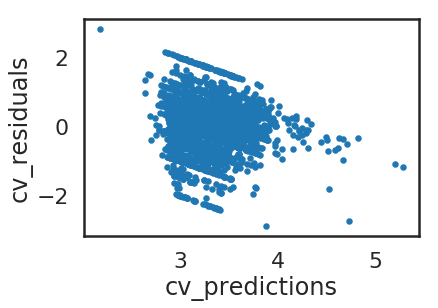

In [21]:
print("Residual plot")
cv_feat_res_df.plot(x='cv_predictions',y='cv_residuals',kind='scatter')

# Plot features vs residuals

In [26]:
cv_feat_res_df.columns

Index(['Established campsites', 'Mountain views', 'Ridges/passes', 'Summits',
       'Waterfalls', 'Wildflowers/Meadows', 'distance_mi', 'highest_pt', 'lat',
       'long', 'num_reports', 'rating_count', 'Issaquah Alps',
       'Mount Rainier Area', 'North Cascades', 'Snoqualmie Region',
       'National Park Pass', 'Northwest Forest Pass', 'Sno-Parks Permit',
       'num_features', 'rating', 'cv_residuals', 'cv_predictions'],
      dtype='object')

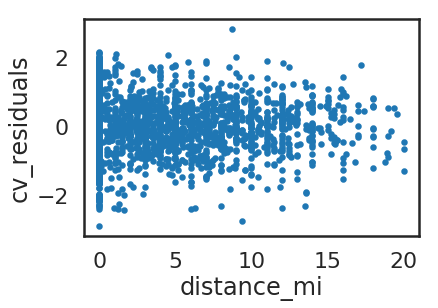

In [22]:
# distance
cv_feat_res_df.plot(x='distance_mi',y='cv_residuals',kind='scatter')

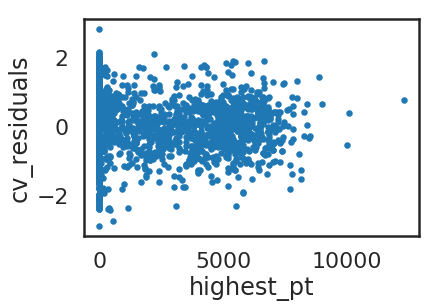

In [23]:
# highest_pt
cv_feat_res_df.plot(x='highest_pt',y='cv_residuals',kind='scatter')

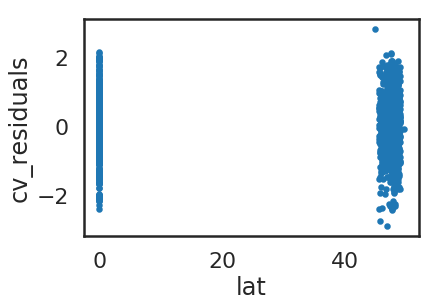

In [24]:
# lat
cv_feat_res_df.plot(x='lat',y='cv_residuals',kind='scatter')

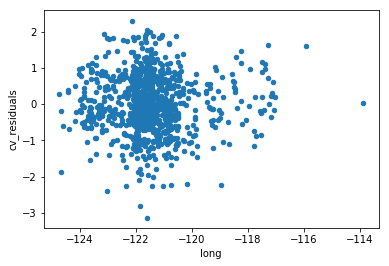

In [31]:
# longitude
cv_feat_res_df.plot(x='long',y='cv_residuals',kind='scatter')

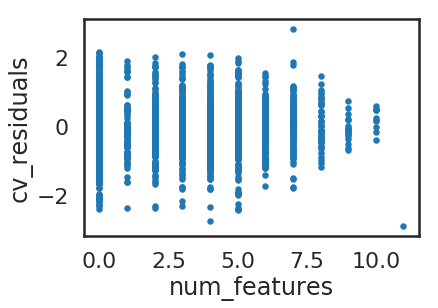

In [25]:
# num_features
cv_feat_res_df.plot(x='num_features',y='cv_residuals',kind='scatter')

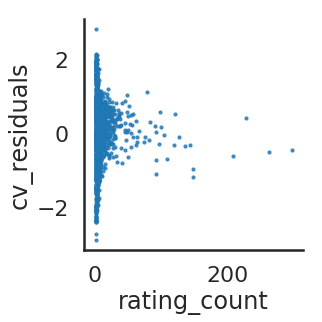

In [26]:
# rating_count
#cv_feat_res_df.plot(x='rating_count',y='cv_residuals',kind='scatter')
#plt.figure(figsize=(15,7))
sns.lmplot(y='cv_residuals',x='rating_count',data=cv_feat_res_df,scatter_kws={"marker":"D","s": 10},fit_reg=False)
plt.savefig('residuals vs rating_count_non_log.png',dpi=300,transparent=True)

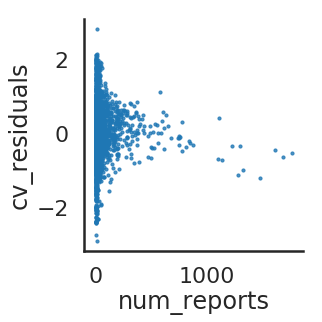

In [27]:
# num_reports
#cv_feat_res_df.plot(x='num_reports',y='cv_residuals',kind='scatter')
sns.lmplot(y='cv_residuals',x='num_reports',data=cv_feat_res_df,scatter_kws={"marker":"D","s": 10},fit_reg=False)
plt.savefig('residuals vs num_reports_nonLog.png',dpi=300,transparent=True)

## It looks like num_reports and rating_count might benefit from a log transformation. Will add these features & re-run (taking out original features)

In [28]:
df_log = df
df_log['log_num_reports']= np.log(df['num_reports'])
df_log['log_rating_count']= np.log(df['rating_count'])
df_log.drop(columns=['num_reports','rating_count'],axis=1, inplace=True)
df_log = df_log.dropna()
df_log.head()

/home/kmussar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


,rating,Established campsites,Mountain views,Ridges/passes,Summits,Waterfalls,Wildflowers/Meadows,distance_mi,highest_pt,lat,...,Issaquah Alps,Mount Rainier Area,North Cascades,Snoqualmie Region,National Park Pass,Northwest Forest Pass,Sno-Parks Permit,num_features,log_num_reports,log_rating_count
0,3.6,1.0,0.0,1.0,0.0,0.0,0.0,12.0,1900.0,48.6855,...,0,0,1,0,0,0,0,5.0,5.187386,2.944439
1,3.4,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1700.0,47.9733,...,0,0,0,0,0,0,0,4.0,3.891820,1.945910
3,2.7,0.0,0.0,0.0,0.0,0.0,0.0,11.5,0.0,48.5076,...,0,0,1,0,0,1,0,0.0,2.639057,1.386294
9,2.0,0.0,1.0,0.0,1.0,0.0,1.0,16.0,8122.0,48.3801,...,0,0,0,0,0,0,0,4.0,2.890372,0.693147
10,3.0,0.0,1.0,1.0,1.0,0.0,1.0,16.0,7750.0,48.5091,...,0,0,1,0,0,1,0,8.0,0.000000,0.000000


In [29]:
df_log.drop(df_log[df_log.log_num_reports < 0.0001].index, inplace=True)
df_log.drop(df_log[df_log.log_rating_count < 0.0001].index, inplace=True)

In [30]:
X1 = df_log.drop(columns=['rating'],axis=1)
y1 = df_log['rating']
# hold out 20% of the data for final testing
X1, X1_test, y1, y1_test = train_test_split(X1, y1, test_size=.2, random_state=10)

In [31]:
import pickle

with open('most_recent_df_log.pickle', 'wb') as to_write:
    pickle.dump(df_log, to_write)

# Plotting residuals (not cross-validation)

In [31]:
df3 = pd.concat([df,cv_results_df])
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1601 entries, 0 to 447
Data columns (total 23 columns):
Established campsites    1137 non-null float64
Issaquah Alps            1137 non-null float64
Mount Rainier Area       1137 non-null float64
Mountain views           1137 non-null float64
National Park Pass       1137 non-null float64
North Cascades           1137 non-null float64
Northwest Forest Pass    1137 non-null float64
Ridges/passes            1137 non-null float64
Sno-Parks Permit         1137 non-null float64
Snoqualmie Region        1137 non-null float64
Summits                  1137 non-null float64
Waterfalls               1137 non-null float64
Wildflowers/Meadows      1137 non-null float64
distance_mi              1137 non-null float64
highest_pt               1137 non-null float64
lat                      1137 non-null float64
long                     1137 non-null float64
num_features             1137 non-null float64
num_reports              1137 non-null float64
p

/home/kmussar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


Residual plot


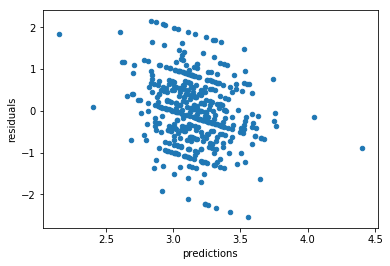

In [34]:
print("Residual plot")
df3.plot(x='predictions',y='residuals',kind='scatter')

Text(0.5, 1.0, 'Normal Q-Q plot')

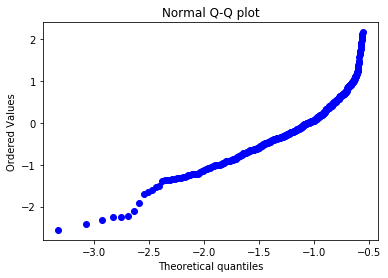

In [32]:
# Q-Q plot
stats.probplot(df3.residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")

# Box-Cox Transformation

In [39]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(df)
print(pt.lambdas_)

[ 1.81615412e+00 -6.01706595e+00  1.75491361e+00 -5.80325534e+00
 -6.51178909e+00 -7.61659644e+00 -3.72037881e-01  4.30185202e-01
  4.21059815e-01  8.44677166e+00 -7.95031022e+00 -4.36578887e-03
 -2.63299688e-01 -2.46030861e+01 -1.60179443e+01 -9.01383456e+00
 -1.22804998e+01 -1.88730993e+01 -3.06311310e+00 -1.37777380e+02
  1.06284884e+00]


In [41]:
pt.transform(df)

array([[ 0.17447958, -0.53740015,  0.81827894, ..., -0.70988521,
        -0.1028689 ,  0.13670423],
       [ 0.47608386, -0.53740015, -1.22207716, ..., -0.70988521,
        -0.1028689 , -0.3668258 ],
       [ 0.78790624, -0.53740015,  0.81827894, ..., -0.70988521,
         9.72111105, -1.35339398],
       ...,
       [-0.25859484, -0.53740015, -1.22207716, ..., -0.70988521,
        -0.1028689 ,  0.13670423],
       [ 0.17447958, -0.53740015, -1.22207716, ..., -0.70988521,
        -0.1028689 , -0.86402518],
       [ 2.31562427, -0.53740015, -1.22207716, ..., -0.70988521,
        -0.1028689 , -0.3668258 ]])

# Standard Scalar

In [32]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lr_scalar = LinearRegression()
lr_scalar.fit(X_train_scaled, y_train)
predictions2 = lr.predict(X_val_scaled)

print('MAE:', metrics.mean_absolute_error(y_val, predictions2))
print('MSE:', metrics.mean_squared_error(y_val, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, predictions2)))
print('R^2:', metrics.explained_variance_score(y_val,predictions2))

MAE: 1.0620371649922125
MSE: 14.316966730683976
RMSE: 3.7837767812972234
R^2: -19.558954956881248


**when I scale, looks like overfitting (negative R2)** 

or.... my effect is just super small... 

# Polynomial 

In [33]:
# none of my data looked polynomial during EDA 
# so my guess is this will be worse than the prev. 2
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)
lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Degree 2 polynomial regression val R^2: -142113.773


**On the plus side, my assumption was correct - polynomial is not the way to go!**

* degree 2 R^2: -35.924
* degree 3 R^2: -945248.883

I will run degree 3 for funsies. Well that's not right. 